In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import scipy.stats as ss
import seaborn as sb
import math

# Підготовка датасету (Лабораторна робота 1)

In [2]:
df = pd.read_csv('train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.dtypes)
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Rows:  891
Columns:  12


In [4]:
def quantitative(df) : 
    table = pd.DataFrame(columns={"Показник" : 1, "Мінімум": 2, "Максимум": 3, "Середнє": 4, "Середньоквадратичне відхилення": 5, "1-й квартиль": 6, "2-й квартиль": 7, "3-й квартиль": 8})
    table.loc[len(table)] = ["Age", df["Age"].min(), df["Age"].max(), df["Age"].mean(), df["Age"].std(), df["Age"].quantile(0.25), df["Age"].quantile(0.50), df["Age"].quantile(0.75)]
    table.loc[len(table)] = ["SibSp", df["SibSp"].min(), df["SibSp"].max(), df["SibSp"].mean(), df["SibSp"].std(), df["SibSp"].quantile(0.25), df["SibSp"].quantile(0.50), df["SibSp"].quantile(0.75)]
    table.loc[len(table)] = ["Parch", df["Parch"].min(), df["Parch"].max(), df["Parch"].mean(), df["Parch"].std(), df["Parch"].quantile(0.25), df["Parch"].quantile(0.50), df["Parch"].quantile(0.75)]
    table.loc[len(table)] = ["Fare", df["Fare"].min(), df["Fare"].max(), df["Fare"].mean(), df["Fare"].std(), df["Fare"].quantile(0.25), df["Fare"].quantile(0.50), df["Fare"].quantile(0.75)]
    display(table.style.hide_index()) 


def qualitative (df) : 
    table = pd.DataFrame(columns={"Показник" : 1, "Кількість унікальних значень": 2, "Частота кожного унікального значення": 3, "Відносна частота кожного унікального значення": 4})
    table.loc[len(table)] = ["Survived", df["Survived"].nunique(), df["Survived"].value_counts(dropna=False), df["Survived"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Pclass", df["Pclass"].nunique(), df["Pclass"].value_counts(dropna=False), df["Pclass"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Sex", df["Sex"].nunique(), df["Sex"].value_counts(dropna=False), df["Sex"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Embarked", df["Embarked"].nunique(), df["Embarked"].value_counts(dropna=False), df["Embarked"].value_counts(dropna=False, normalize=True)]
    display(table.style.hide_index()) 
    
print("\nКількісні показники\n")
quantitative(df)
print("\nЯкісні показники\n")
qualitative (df)


Кількісні показники



Показник,Мінімум,Максимум,Середнє,Середньоквадратичне відхилення,1-й квартиль,2-й квартиль,3-й квартиль
Age,0.420000,80.000000,29.699118,14.526497,20.125000,28.000000,38.000000
SibSp,0.000000,8.000000,0.523008,1.102743,0.000000,0.000000,1.000000
Parch,0.000000,6.000000,0.381594,0.806057,0.000000,0.000000,0.000000
Fare,0.000000,512.329200,32.204208,49.693429,7.910400,14.454200,31.000000



Якісні показники



Показник,Кількість унікальних значень,Частота кожного унікального значення,Відносна частота кожного унікального значення
Survived,2,"0 549 1 342 Name: Survived, dtype: int64","0 0.616162 1 0.383838 Name: Survived, dtype: float64"
Pclass,3,"3 491 1 216 2 184 Name: Pclass, dtype: int64","3 0.551066 1 0.242424 2 0.206510 Name: Pclass, dtype: float64"
Sex,2,"male 577 female 314 Name: Sex, dtype: int64","male 0.647587 female 0.352413 Name: Sex, dtype: float64"
Embarked,3,"S 644 C 168 Q 77 NaN 2 Name: Embarked, dtype: int64","S 0.722783 C 0.188552 Q 0.086420 NaN 0.002245 Name: Embarked, dtype: float64"


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

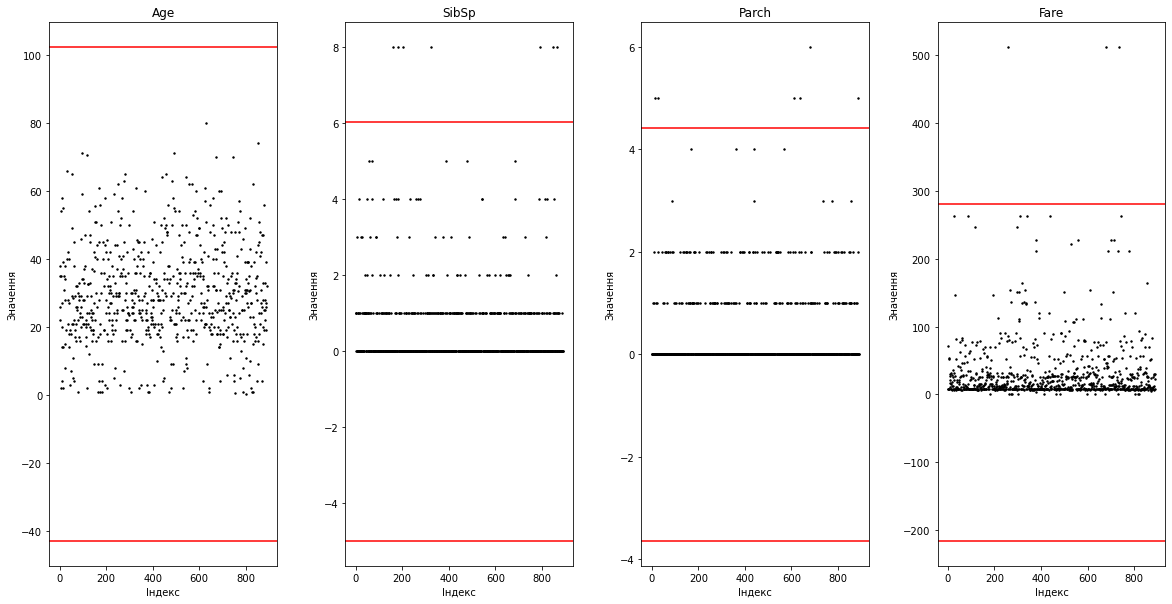

In [6]:
def get_diapazon(data) :
    u = 5
    mean = data.mean()
    std = data.std()
    a = mean - (u * std)
    b = mean + (u * std)
    return a, b

def get_anomalies_chart(data, title) :
    chart = plt.scatter(data.index, data, color = 'black', s = 2)
    plt.title(title)
    plt.xlabel("Індекс")
    plt.ylabel("Значення")
    a, b = get_diapazon(data)
    plt.axhline(y = a, color = 'r')
    plt.axhline(y = b, color = 'r')
    return chart

def get_figure_an(df) :
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 4, 1)
    chart = get_anomalies_chart(df["Age"], "Age")
    plt.subplot(1, 4, 2)
    chart = get_anomalies_chart(df["SibSp"], "SibSp")
    plt.subplot(1, 4, 3)
    chart = get_anomalies_chart(df["Parch"], "Parch")
    plt.subplot(1, 4, 4)
    chart = get_anomalies_chart(df["Fare"], "Fare")
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    
    
get_figure_an(df)

def replace_anomalies(title) :
    a, b = get_diapazon(df[title])
    df.loc[(df[title] < a), title] = None
    df.loc[(df[title] > b), title] = None
       
replace_anomalies("Fare")

In [7]:
means = df.mean()
df = df.fillna(means)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [8]:
for name, values in df[["Survived", "Pclass", "Sex", "Embarked"]].iteritems() :
    val = list(values.value_counts(dropna=False).to_dict().keys())[0]
    values = values.fillna(val)
    df[name] = values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

([<matplotlib.patches.Wedge at 0x17af7af4670>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

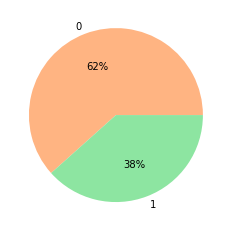

In [10]:
plt.pie(df['Survived'].value_counts(dropna=False), labels=df['Survived'].unique(), autopct='%.0f%%', colors=sb.color_palette('pastel')[1:3])

In [10]:
df["Sex"] = df["Sex"].map({'male': 0, 'female': 1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [11]:
df = pd.get_dummies(df, columns=['Pclass','Embarked'], drop_first=True)
df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,0,0,0,0


In [12]:
# Нормалізація
for name, values in df[["Age", "SibSp", "Parch", "Fare"]].iteritems() :
    min_v = values.min()
    max_v = values.max()
    values = pd.Series((v - min_v) / (max_v - min_v) for v in values)
    df[name] = values

In [13]:
df = df.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,0,0.271174,0.125,0.000000,0.027567,0,1,0,1
1,1,1,0.472229,0.125,0.000000,0.271039,0,0,0,0
2,1,1,0.321438,0.000,0.000000,0.030133,0,1,0,1
3,1,1,0.434531,0.125,0.000000,0.201901,0,0,0,1
4,0,0,0.434531,0.000,0.000000,0.030608,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.334004,0.000,0.000000,0.049430,1,0,0,1
887,1,1,0.233476,0.000,0.000000,0.114068,0,0,0,1
888,0,1,0.367921,0.125,0.333333,0.089163,0,1,0,1
889,1,0,0.321438,0.000,0.000000,0.114068,0,0,0,0


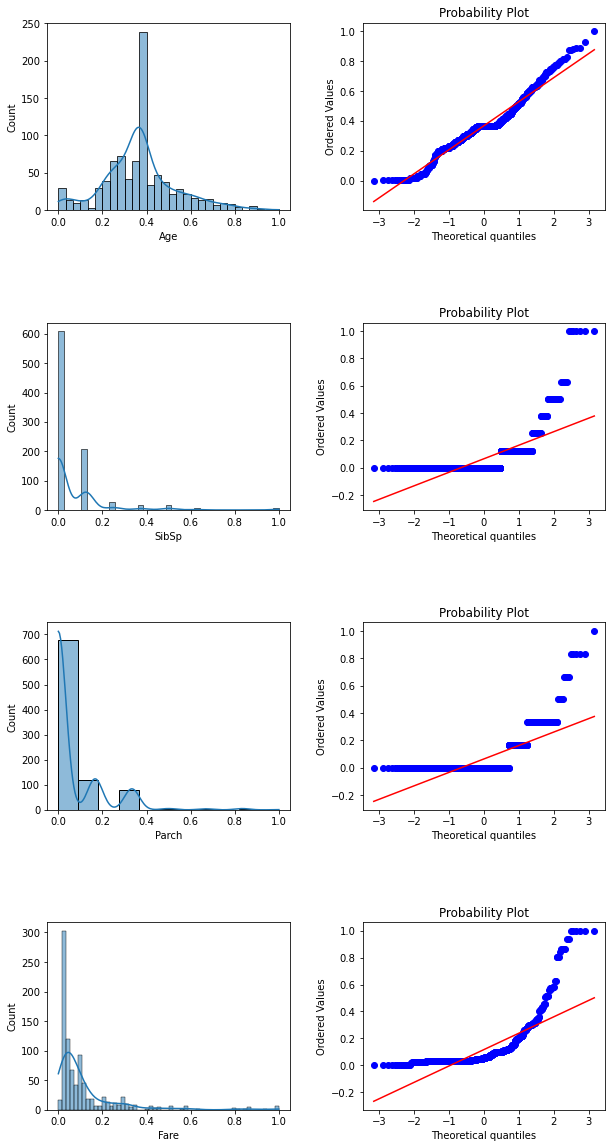

In [15]:
def get_hist_and_prob(df) :
    plt.figure(figsize=(10, 20))
    plt.subplot(4, 2, 1)
    sb.histplot(df["Age"], kde = True)
    plt.subplot(4, 2, 2)
    ss.probplot(df["Age"], plot = plt)
    plt.subplot(4, 2, 3)
    sb.histplot(df["SibSp"], kde = True)
    plt.subplot(4, 2, 4)
    ss.probplot(df["SibSp"], plot = plt)
    plt.subplot(4, 2, 5)
    sb.histplot(df["Parch"], kde = True)
    plt.subplot(4, 2, 6)
    ss.probplot(df["Parch"], plot = plt)
    plt.subplot(4, 2, 7)
    sb.histplot(df["Fare"], kde = True)
    plt.subplot(4, 2, 8)
    ss.probplot(df["Fare"], plot = plt)
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    
    
get_hist_and_prob(df)


# Лабораторна робота 2

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV

In [15]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,0,0.271174,0.125,0.000000,0.027567,0,1,0,1
1,1,1,0.472229,0.125,0.000000,0.271039,0,0,0,0
2,1,1,0.321438,0.000,0.000000,0.030133,0,1,0,1
3,1,1,0.434531,0.125,0.000000,0.201901,0,0,0,1
4,0,0,0.434531,0.000,0.000000,0.030608,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.334004,0.000,0.000000,0.049430,1,0,0,1
887,1,1,0.233476,0.000,0.000000,0.114068,0,0,0,1
888,0,1,0.367921,0.125,0.333333,0.089163,0,1,0,1
889,1,0,0.321438,0.000,0.000000,0.114068,0,0,0,0


In [16]:
# Розбивання підготовленого в ЛР1 датасету на х та у

X = df.iloc[:, 1:]
y = df['Survived']

In [17]:
# Створити три різних класифікатори з гіперпараметрами по замовчуванню

DTClsf = DecisionTreeClassifier()
KNClsf = KNeighborsClassifier()
LRClsf = LogisticRegression()

In [18]:
# Навчити ці класифікатори на усьому наборі даних і за можливості візуалізувати їх

DTClsf.fit(X, y)
KNClsf.fit(X, y)
LRClsf.fit(X, y)

LogisticRegression()

[Text(918.7996502471046, 1593.7363636363636, 'X[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(462.8501990565096, 1519.6090909090908, 'X[1] <= 0.076\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(196.13009185303514, 1445.4818181818182, 'X[2] <= 0.312\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(185.43360623003196, 1371.3545454545454, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(206.82657747603832, 1371.3545454545454, 'X[1] <= 0.026\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(196.13009185303514, 1297.2272727272727, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(217.52306309904154, 1297.2272727272727, 'X[4] <= 0.119\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(206.82657747603832, 1223.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(228.21954872204472, 1223.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(729.570306259984, 1445.4818181818182, 'X[4] <= 0.1\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(420.

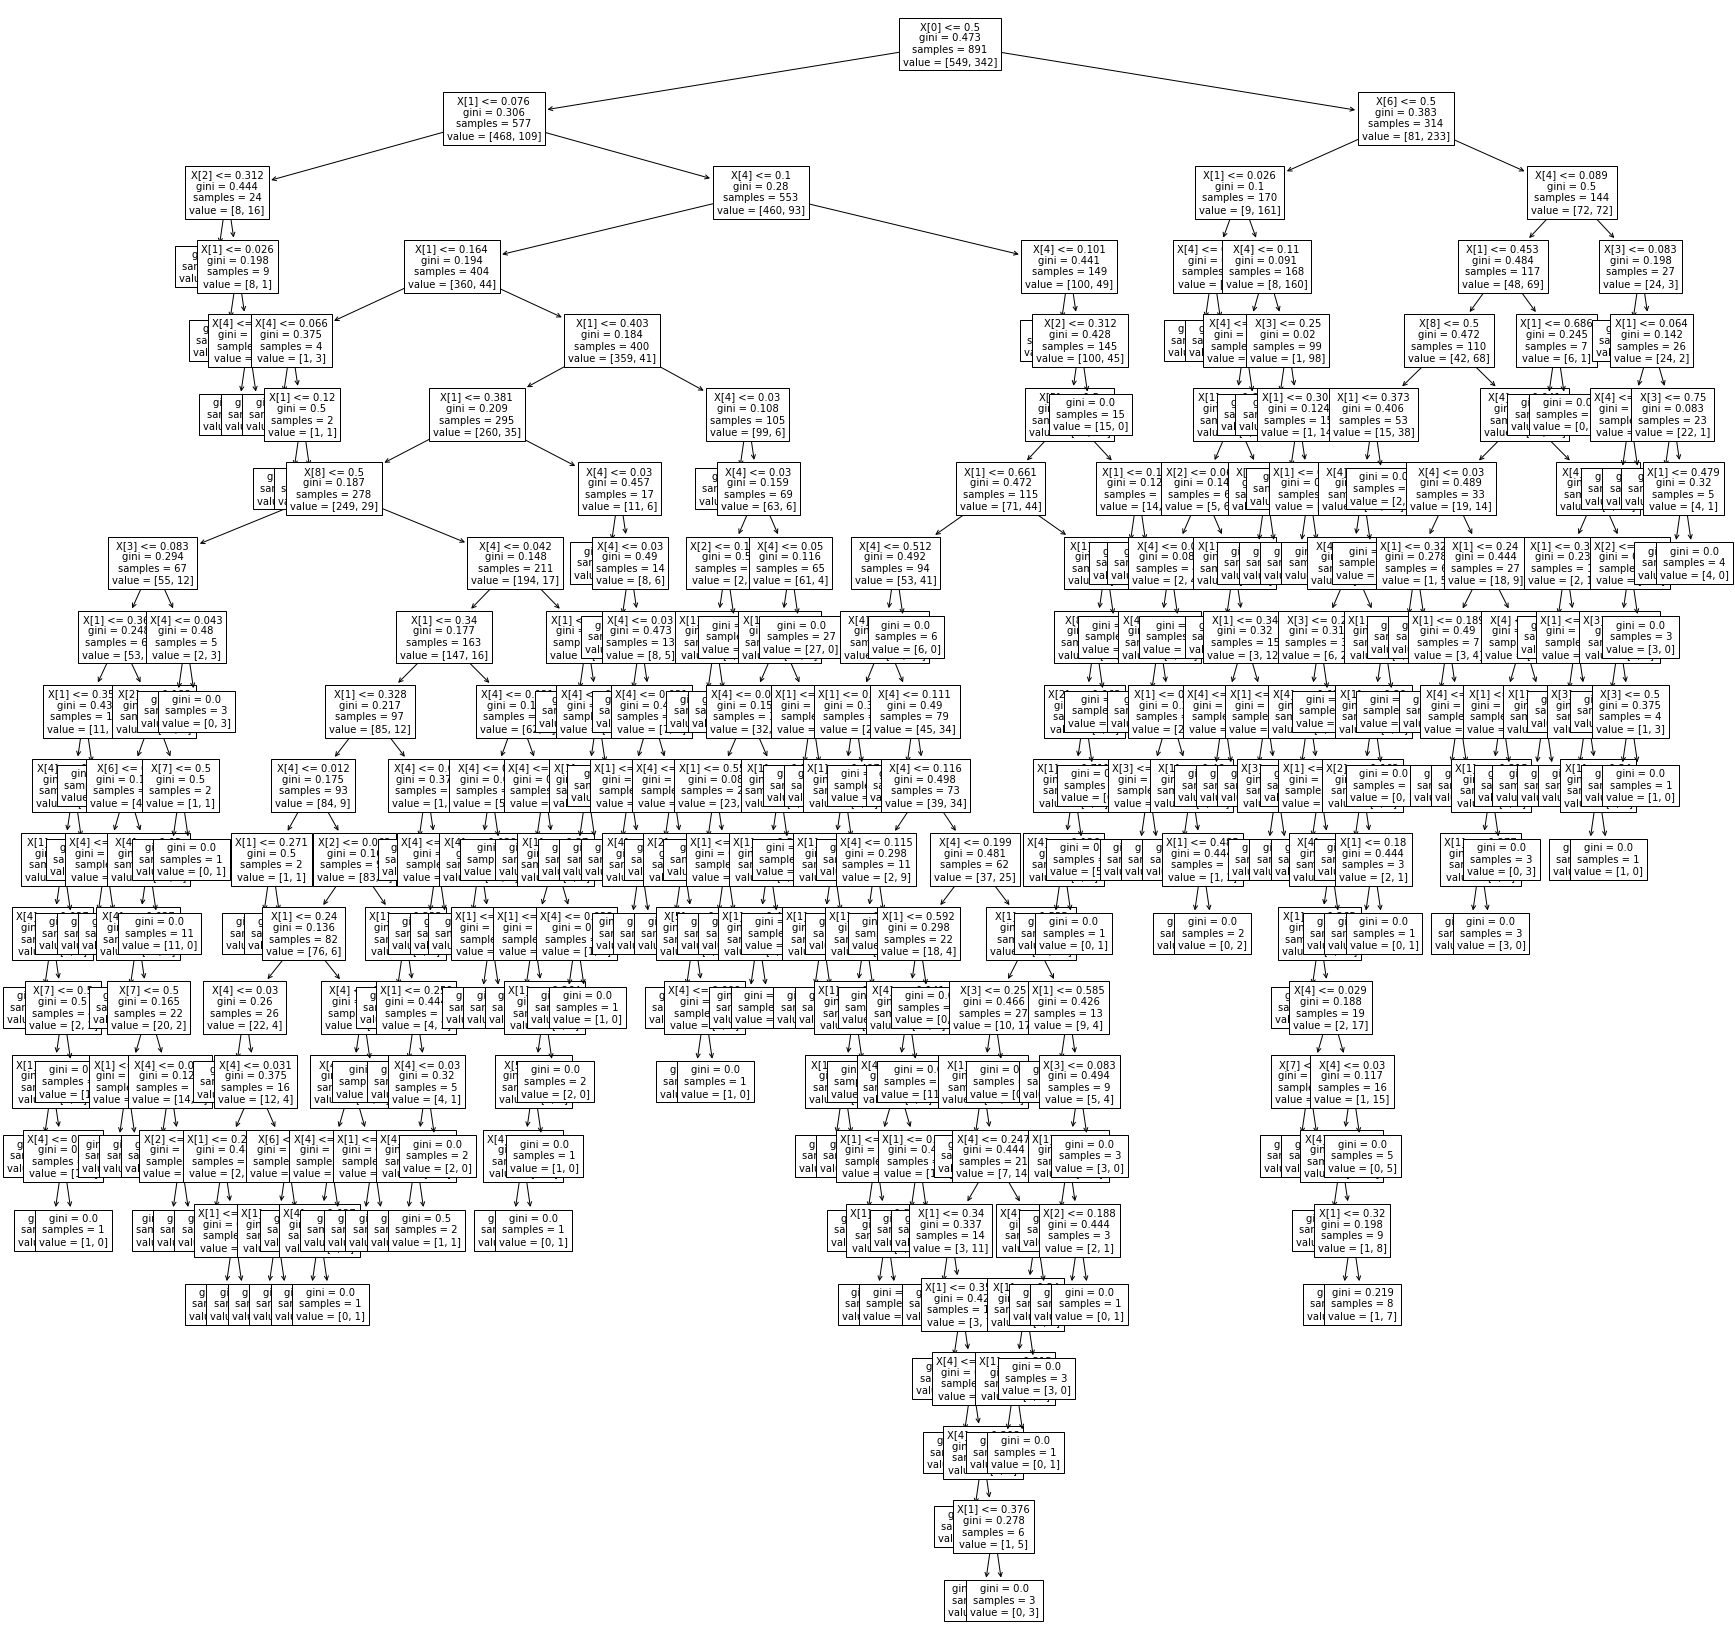

In [19]:
plt.figure(figsize=(30, 30))
plot_tree(DTClsf, fontsize=10)

In [20]:
# Після цього слід вручну створити тестовий набір даних з декількох об’єктів і одержати прогнози цільової ознаки за допомогою навчених класифікаторів

X_test = [
    [1, 0.27, 0.0, 0.0, 0.09, 1, 0, 0, 1],
    [0, 0.96, 0.125, 0.3, 0.17, 0, 1, 0, 0],
    [0, 0.57, 0.0, 0.16, 0.03, 1, 0, 1, 0]
]

X_test

[[1, 0.27, 0.0, 0.0, 0.09, 1, 0, 0, 1],
 [0, 0.96, 0.125, 0.3, 0.17, 0, 1, 0, 0],
 [0, 0.57, 0.0, 0.16, 0.03, 1, 0, 1, 0]]

In [21]:
DTClsf.predict(X_test)

array([1, 1, 0], dtype=int64)

In [22]:
KNClsf.predict(X_test)

array([1, 0, 0], dtype=int64)

In [23]:
LRClsf.predict(X_test)

array([1, 0, 0], dtype=int64)

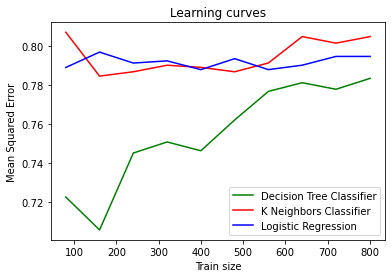

In [48]:
train_sizes_DT, train_scores_DT, test_scores_DT = learning_curve(DTClsf, X, y, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_KN, train_scores_KN, test_scores_KN = learning_curve(KNClsf, X, y, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_LR, train_scores_LR, test_scores_LR = learning_curve(LRClsf, X, y, train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(train_sizes_DT, test_scores_DT.mean(1), color="g", label="Decision Tree Classifier")
plt.plot(train_sizes_KN, test_scores_KN.mean(1), color="r", label="K Neighbors Classifier")
plt.plot(train_sizes_LR, test_scores_LR.mean(1), color="b", label="Logistic Regression")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()

## Техніки відкладеної вибірки

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
556,1,0.597889,0.125,0.000000,0.150570,0,0,0,0
249,0,0.673285,0.125,0.000000,0.098859,1,0,0,1
95,0,0.367921,0.000,0.000000,0.030608,0,1,0,1
161,1,0.497361,0.000,0.000000,0.059886,1,0,0,1
829,1,0.773813,0.000,0.000000,0.304183,0,0,0,1
...,...,...,...,...,...,...,...,...,...
438,0,0.798944,0.125,0.666667,1.000000,0,0,0,1
231,0,0.359135,0.000,0.000000,0.029563,0,1,0,1
96,0,0.886906,0.000,0.000000,0.131765,0,0,0,0
374,1,0.032420,0.375,0.166667,0.080133,0,1,0,1


In [25]:
y_train

556    1
249    0
95     0
161    1
829    1
      ..
438    0
231    0
96     0
374    0
371    0
Name: Survived, Length: 712, dtype: int64

#### DecisionTreeClassifier

In [26]:
DTClsf.fit(X_train, y_train)

y_predDTClsf = DTClsf.predict(X_test)

In [27]:
confusion_matrix(y_test, y_predDTClsf)

array([[84, 29],
       [19, 47]], dtype=int64)

In [28]:
accuracy_score(y_test, y_predDTClsf)

0.7318435754189944

In [29]:
y_predDTClsf_train = DTClsf.predict(X_train)
accuracy_score(y_train, y_predDTClsf_train)

0.9831460674157303

In [30]:
f1_score(y_test, y_predDTClsf)

0.6619718309859155

#### KNeighborsClassifier

In [31]:
KNClsf.fit(X_train, y_train)

y_predKNClsf = KNClsf.predict(X_test)

In [32]:
confusion_matrix(y_test, y_predKNClsf)

array([[95, 18],
       [18, 48]], dtype=int64)

In [33]:
accuracy_score(y_test, y_predKNClsf)

0.7988826815642458

In [34]:
y_predKNClsf_train = KNClsf.predict(X_train)
accuracy_score(y_train, y_predKNClsf_train)

0.8567415730337079

In [35]:
f1_score(y_test, y_predKNClsf)

0.7272727272727273

#### LogisticRegression

In [36]:
LRClsf.fit(X_train, y_train)

y_predLRClsf = LRClsf.predict(X_test)

In [37]:
confusion_matrix(y_test, y_predLRClsf)

array([[91, 22],
       [16, 50]], dtype=int64)

In [38]:
accuracy_score(y_test, y_predLRClsf)

0.7877094972067039

In [39]:
y_predLRClsf_train = LRClsf.predict(X_train)
accuracy_score(y_train, y_predLRClsf_train)

0.8033707865168539

In [40]:
f1_score(y_test, y_predLRClsf)

0.7246376811594203

## Техніки ковзного контролю

In [41]:
num = 5
idx = 0
DTas_sum = 0
DTas_train_sum = 0
DTf1s_sum = 0
KNas_sum = 0
KNas_train_sum = 0
KNf1s_sum = 0
LRas_sum = 0
LRas_train_sum = 0
LRf1s_sum = 0

kf = KFold(n_splits=num, shuffle=True)

for train_index, test_index in kf.split(X) :
    idx = idx + 1
    print('\n--- ', idx)
    
    df_train = df.iloc[train_index, :]
    df_test = df.iloc[test_index, :]
    
    X_train = df_train.iloc[:, 1:]
    y_train = df_train['Survived']
    
    X_test = df_test.iloc[:, 1:]
    y_test = df_test['Survived']
    
    
    print('\n--- DecisionTreeClassifier')
    DTClsf.fit(X_train, y_train)

    y_predDTClsf = DTClsf.predict(X_test)
    DTas = accuracy_score(y_test, y_predDTClsf)
    DTas_sum = DTas_sum + DTas
    print('accuracy_score : ', DTas)
    
    y_predDTClsf_train = DTClsf.predict(X_train)
    DTas_train = accuracy_score(y_train, y_predDTClsf_train)
    DTas_train_sum = DTas_train_sum + DTas_train
    print('accuracy_score train : ', DTas_train)
    
    DTf1s = f1_score(y_test, y_predDTClsf)
    DTf1s_sum = DTf1s_sum + DTf1s
    print('f1_score : ', DTf1s)
    
    print('confusion_matrix : ')
    print(confusion_matrix(y_test, y_predDTClsf))
    
    
    
    print('\n--- KNeighborsClassifier')
    KNClsf.fit(X_train, y_train)
    
    y_predKNClsf = KNClsf.predict(X_test)
    KNas = accuracy_score(y_test, y_predKNClsf)
    KNas_sum = KNas_sum + KNas
    print('accuracy_score : ', KNas)
    
    y_predKNClsf_train = KNClsf.predict(X_train)
    KNas_train = accuracy_score(y_train, y_predKNClsf_train)
    KNas_train_sum = KNas_train_sum + KNas_train
    print('accuracy_score train : ', KNas_train)
    
    KNf1s = f1_score(y_test, y_predKNClsf)
    KNf1s_sum = KNf1s_sum + KNf1s
    print('f1_score : ', KNf1s)
    
    print('confusion_matrix : ')
    print(confusion_matrix(y_test, y_predKNClsf))
    
    
    
    print('\n--- LogisticRegression')
    LRClsf.fit(X_train, y_train)
    
    y_predLRClsf = LRClsf.predict(X_test)
    LRas = accuracy_score(y_test, y_predLRClsf)
    LRas_sum = LRas_sum + LRas
    print('accuracy_score : ', LRas)
    
    y_predLRClsf_train = LRClsf.predict(X_train)
    LRas_train = accuracy_score(y_train, y_predLRClsf_train)
    LRas_train_sum = LRas_train_sum + LRas_train
    print('accuracy_score train : ', LRas_train)
    
    LRf1s = f1_score(y_test, y_predLRClsf)
    LRf1s_sum = LRf1s_sum + LRf1s
    print('f1_score : ', LRf1s)
    
    print('confusion_matrix : ')
    print(confusion_matrix(y_test, y_predLRClsf))


---  1

--- DecisionTreeClassifier
accuracy_score :  0.7430167597765364
accuracy_score train :  0.9859550561797753
f1_score :  0.6666666666666666
confusion_matrix : 
[[87 24]
 [22 46]]

--- KNeighborsClassifier
accuracy_score :  0.7653631284916201
accuracy_score train :  0.8595505617977528
f1_score :  0.6612903225806451
confusion_matrix : 
[[96 15]
 [27 41]]

--- LogisticRegression
accuracy_score :  0.7597765363128491
accuracy_score train :  0.8117977528089888
f1_score :  0.6717557251908397
confusion_matrix : 
[[92 19]
 [24 44]]

---  2

--- DecisionTreeClassifier
accuracy_score :  0.7471910112359551
accuracy_score train :  0.9873772791023843
f1_score :  0.6666666666666667
confusion_matrix : 
[[88 26]
 [19 45]]

--- KNeighborsClassifier
accuracy_score :  0.7865168539325843
accuracy_score train :  0.8667601683029453
f1_score :  0.6885245901639345
confusion_matrix : 
[[98 16]
 [22 42]]

--- LogisticRegression
accuracy_score :  0.7752808988764045
accuracy_score train :  0.805049088359046

In [42]:
print('\n--- DecisionTreeClassifier')
print('accuracy_score :', DTas_sum / num)
print('accuracy_score train :', DTas_train_sum / num)
print('f1_score :', DTf1s_sum / num)
    
print('\n--- KNeighborsClassifier')
print('accuracy_score :', KNas_sum / num)
print('accuracy_score train :', KNas_train_sum / num)
print('f1_score :', KNf1s_sum / num)

print('\n--- LogisticRegression')
print('accuracy_score :', LRas_sum / num)
print('accuracy_score train :', LRas_train_sum / num)
print('f1_score :', LRf1s_sum / num)


--- DecisionTreeClassifier
accuracy_score : 0.7766932395957568
accuracy_score train : 0.9837267756118315
f1_score : 0.7108083843141502

--- KNeighborsClassifier
accuracy_score : 0.8036344234511329
accuracy_score train : 0.8597081488251886
f1_score : 0.7301239879730794

--- LogisticRegression
accuracy_score : 0.7991463184985249
accuracy_score train : 0.8021912476164962
f1_score : 0.7243618031783224


In [43]:
cvDT = cross_validate(DTClsf, X, y, cv=KFold(n_splits=num, shuffle=True), scoring='accuracy', return_train_score=True)
print('--- DecisionTreeClassifier\n')
print('Test :', cvDT['test_score'].mean())
print('Train :', cvDT['train_score'].mean())

--- DecisionTreeClassifier

Test : 0.794677044755508
Train : 0.9840057046503933


In [44]:
cvKN = cross_validate(KNClsf, X, y, cv=KFold(n_splits=num, shuffle=True), scoring='accuracy', return_train_score=True)
print('--- KNeighborsClassifier\n')
print('Test :', cvKN['test_score'].mean())
print('Train :', cvKN['train_score'].mean())

--- KNeighborsClassifier

Test : 0.8091770761408574
Train : 0.8557767464582315


In [45]:
cvLR = cross_validate(LRClsf, X, y, cv=KFold(n_splits=num, shuffle=True), scoring='accuracy', return_train_score=True)
print('--- LogisticRegression\n')
print('Test :', cvLR['test_score'].mean())
print('Train :', cvLR['train_score'].mean())

--- LogisticRegression

Test : 0.7901701085933087
Train : 0.8044337110169092


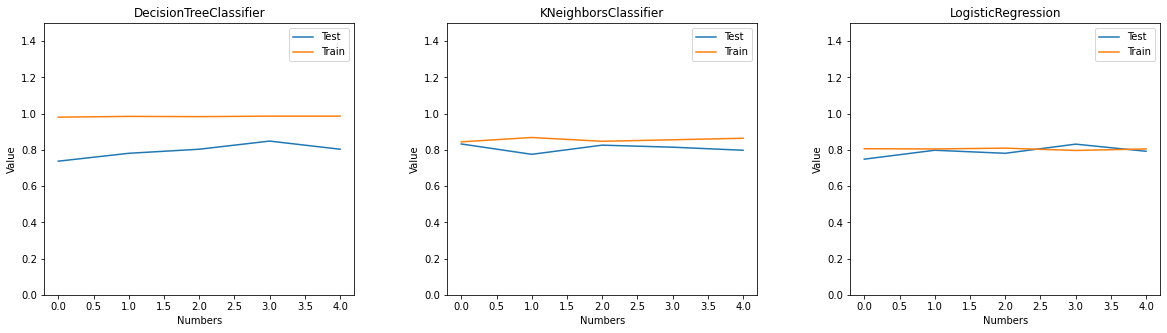

In [46]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(range(5), cvDT['test_score'], label='Test')
plt.plot(range(5), cvDT['train_score'], label='Train')
plt.legend()
plt.title('DecisionTreeClassifier')
plt.xlabel('Numbers')
plt.ylabel('Value')
plt.ylim(0, 1.5)

plt.subplot(1, 3, 2)
plt.plot(range(5), cvKN['test_score'], label='Test')
plt.plot(range(5), cvKN['train_score'], label='Train')
plt.legend()
plt.title('KNeighborsClassifier')
plt.xlabel('Numbers')
plt.ylabel('Value')
plt.ylim(0, 1.5)

plt.subplot(1, 3, 3)
plt.plot(range(5), cvLR['test_score'], label='Test')
plt.plot(range(5), cvLR['train_score'], label='Train')
plt.legend()
plt.title('LogisticRegression')
plt.xlabel('Numbers')
plt.ylabel('Value')
plt.ylim(0, 1.5)

plt.subplots_adjust(wspace=0.3, hspace=0.6)

In [47]:
DTcvs = cross_val_score(DTClsf, X, y, cv=5)
print(DTcvs.mean())

0.7789655388864478


### Інші гіперпараметри

#### DecisionTreeClassifier

In [55]:
# 5. Спробувати створити класифікатори з іншими гіперпараметрами та оцінити якість їх прогнозів 
#    (тут можна використати будь-яку техніку оцінки якості – відкладену вибірку або ковзний контроль). 
#    На цьому етапі слід спробувати налаштувати декілька найважливіших гіперпараметрів, підібравши такі їх значення, за яких якість класифікації найвища. 
#    Корисною для цього може виявитися крива валідації. 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
DTClsf_my = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', max_features = 5, random_state = 0)
DTClsf_my.fit(X_train, y_train)
predDTClsf_my = DTClsf_my.predict(X_test)
accuracy_score(y_test, predDTClsf_my)

0.8659217877094972

In [92]:
DTClsf_my2 = DecisionTreeClassifier(max_depth = 11, criterion = 'entropy', max_features = 5, random_state = 1)
DTClsf_my2.fit(X_train, y_train)
predDTClsf_my2 = DTClsf_my2.predict(X_test)
accuracy_score(y_test, predDTClsf_my2)

0.8044692737430168

In [93]:
DTClsf_my3 = DecisionTreeClassifier(max_depth = 6, criterion = 'gini', max_features = 5, random_state = 3)
DTClsf_my3.fit(X_train, y_train)
predDTClsf_my3 = DTClsf_my3.predict(X_test)
accuracy_score(y_test, predDTClsf_my3)

0.8547486033519553

In [94]:
DTClsf_my4 = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy', max_features = 5, random_state = 3)
DTClsf_my4.fit(X_train, y_train)
predDTClsf_my4 = DTClsf_my4.predict(X_test)
accuracy_score(y_test, predDTClsf_my4)

0.8715083798882681

In [95]:
DTClsf_my5 = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', max_features = 7, random_state = 3)
DTClsf_my5.fit(X_train, y_train)
predDTClsf_my5 = DTClsf_my5.predict(X_test)
accuracy_score(y_test, predDTClsf_my5)

0.8491620111731844

In [89]:
DTClsf_my6 = DecisionTreeClassifier(max_depth = 5, criterion = 'gini', max_features = 6, random_state = 3)
DTClsf_my6.fit(X_train, y_train)
predDTClsf_my6 = DTClsf_my6.predict(X_test)
accuracy_score(y_test, predDTClsf_my6)

0.776536312849162

In [96]:
parameter_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7],
                  'max_depth' : [5, 6, 7, 8, 9],
                  'random_state' : [1, 2, 3],
                  'criterion':['gini','entropy']
                 }

grid_search = GridSearchCV(DTClsf, param_grid = parameter_grid, cv=10)

grid_search.fit(X_train, y_train)

print ("Best Score: ", grid_search.best_score_)
print ("Best params: ", grid_search.best_params_)

Best Score:  0.8203051643192488
Best params:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 5, 'random_state': 2}


In [97]:
DTClsf_gs = grid_search.best_estimator_
DTClsf_gs.fit(X_train, y_train)
predDTClsf_gs = DTClsf_gs.predict(X_test)
accuracy_score(y_test, predDTClsf_gs)

0.8268156424581006

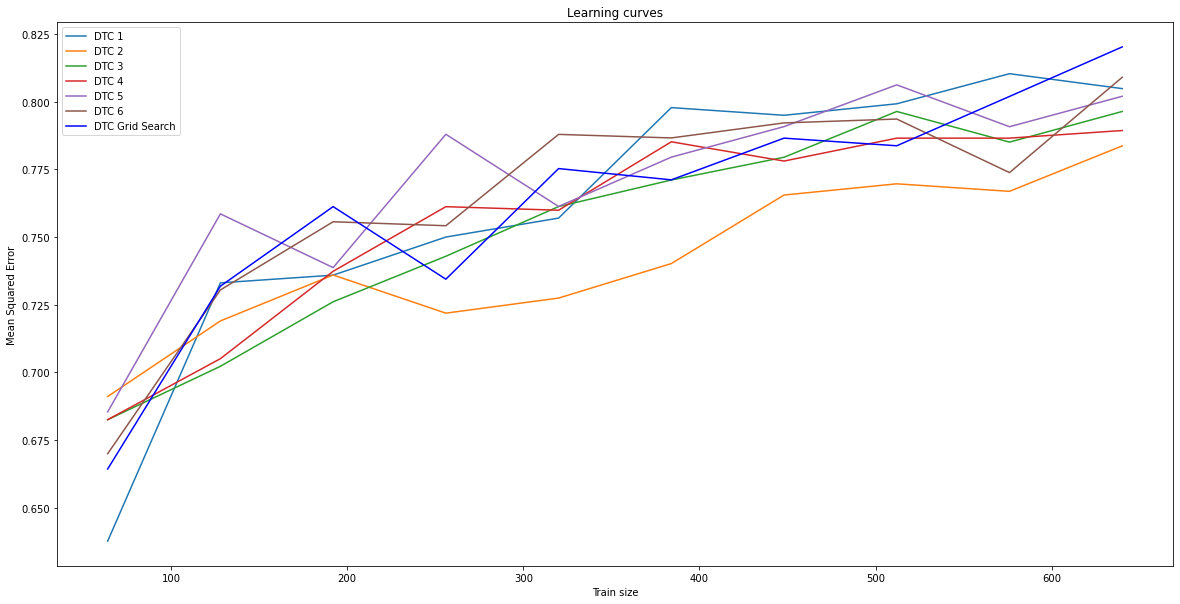

In [228]:
train_sizes_DT1, train_scores_DT1, test_scores_DT1 = learning_curve(DTClsf_my,  X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT2, train_scores_DT2, test_scores_DT2 = learning_curve(DTClsf_my2, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT3, train_scores_DT3, test_scores_DT3 = learning_curve(DTClsf_my3, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT4, train_scores_DT4, test_scores_DT4 = learning_curve(DTClsf_my4, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT5, train_scores_DT5, test_scores_DT5 = learning_curve(DTClsf_my5, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT6, train_scores_DT6, test_scores_DT6 = learning_curve(DTClsf_my6, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_DT_gs, train_scores_DT_gs, test_scores_DT_gs = learning_curve(DTClsf_gs, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.figure(figsize=(20, 10))
plt.plot(train_sizes_DT1, test_scores_DT1.mean(1), label="DTC 1")
plt.plot(train_sizes_DT2, test_scores_DT2.mean(1), label="DTC 2")
plt.plot(train_sizes_DT3, test_scores_DT3.mean(1), label="DTC 3")
plt.plot(train_sizes_DT4, test_scores_DT4.mean(1), label="DTC 4")
plt.plot(train_sizes_DT5, test_scores_DT5.mean(1), label="DTC 5")
plt.plot(train_sizes_DT6, test_scores_DT6.mean(1), label="DTC 6")
plt.plot(train_sizes_DT_gs, test_scores_DT_gs.mean(1), color='b', label="DTC Grid Search")

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()

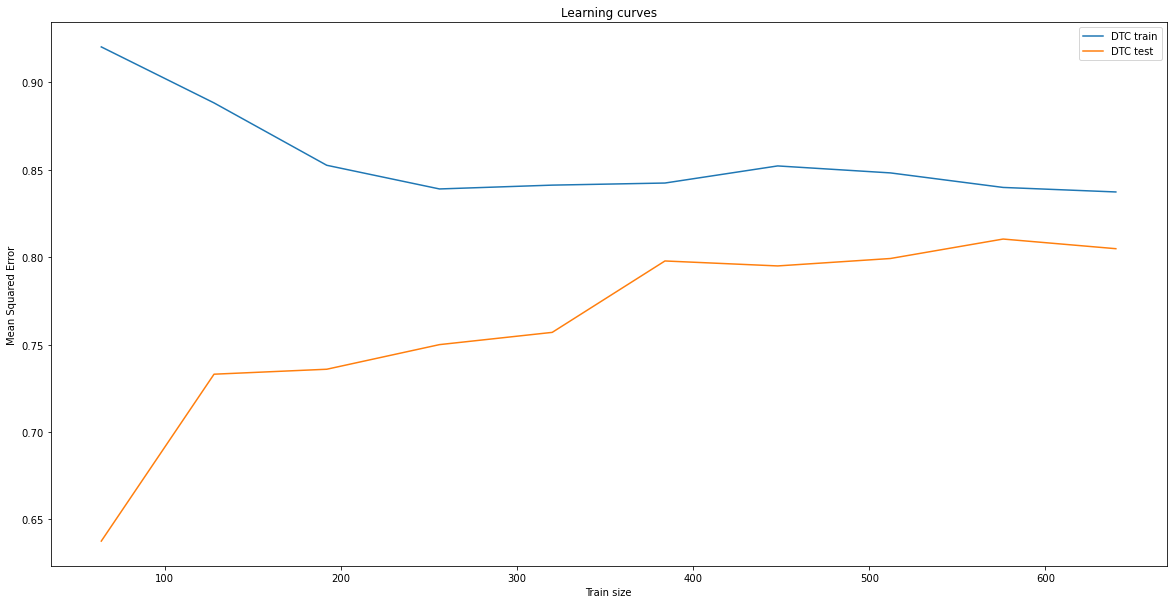

In [238]:
plt.figure(figsize=(20, 10))
plt.plot(train_sizes_DT1, train_scores_DT1.mean(1), label="DTC train")
plt.plot(train_sizes_DT1, test_scores_DT1.mean(1), label="DTC test")

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()

#### KNeighborsClassifier

In [110]:
KNClsf_my = KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='uniform')
KNClsf_my.fit(X_train, y_train)
predKNClsf_my = KNClsf_my.predict(X_test)
accuracy_score(y_test, predKNClsf_my)

0.8212290502793296

In [115]:
KNClsf_my2 = KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='uniform')
KNClsf_my2.fit(X_train, y_train)
predKNClsf_my2 = KNClsf_my2.predict(X_test)
accuracy_score(y_test, predKNClsf_my2)

0.8100558659217877

In [116]:
KNClsf_my3 = KNeighborsClassifier(metric='minkowski', n_neighbors=25, weights='uniform')
KNClsf_my3.fit(X_train, y_train)
predKNClsf_my3 = KNClsf_my3.predict(X_test)
accuracy_score(y_test, predKNClsf_my3)

0.8156424581005587

In [125]:
KNClsf_my4 = KNeighborsClassifier(metric='euclidean', n_neighbors=31, weights='uniform')
KNClsf_my4.fit(X_train, y_train)
predKNClsf_my4 = KNClsf_my4.predict(X_test)
accuracy_score(y_test, predKNClsf_my4)

0.8268156424581006

In [136]:
KNClsf_my5 = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='uniform')
KNClsf_my5.fit(X_train, y_train)
predKNClsf_my5 = KNClsf_my5.predict(X_test)
accuracy_score(y_test, predKNClsf_my5)

0.8324022346368715

In [133]:
KNClsf_my6 = KNeighborsClassifier(metric='euclidean', n_neighbors=35, weights='uniform')
KNClsf_my6.fit(X_train, y_train)
predKNClsf_my6 = KNClsf_my6.predict(X_test)
accuracy_score(y_test, predKNClsf_my6)

0.8491620111731844

In [131]:
parameter_grid = {'n_neighbors': list(range(1, 41)),
                  'weights' : ['uniform', 'distance'],
                  'metric' : ['euclidean', 'manhattan', 'minkowski'],
                 }

grid_search = GridSearchCV(KNClsf, param_grid = parameter_grid, cv=10)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.8062597809076684
Best params: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}


In [134]:
KNClsf_gs = grid_search.best_estimator_
KNClsf_gs.fit(X_train, y_train)
predKNClsf_gs = KNClsf_gs.predict(X_test)
accuracy_score(y_test, predKNClsf_gs)

0.8324022346368715

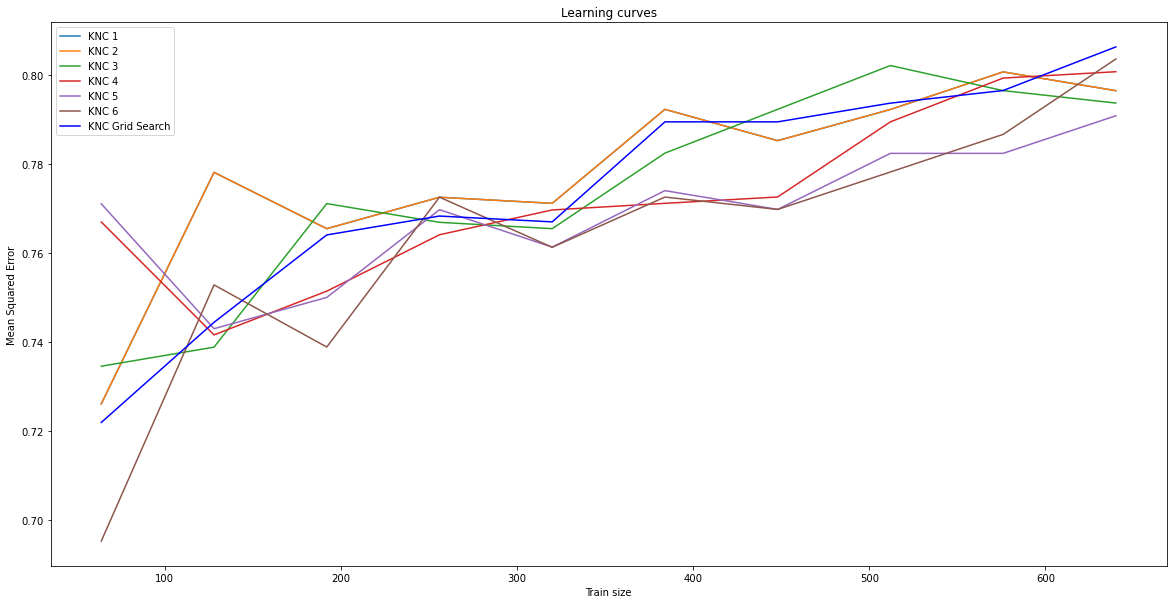

In [142]:
train_sizes_KN1, train_scores_KN1, test_scores_KN1 = learning_curve(KNClsf_my,  X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_KN2, train_scores_KN2, test_scores_KN2 = learning_curve(KNClsf_my2, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_KN3, train_scores_KN3, test_scores_KN3 = learning_curve(KNClsf_my3, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_KN4, train_scores_KN4, test_scores_KN4 = learning_curve(KNClsf_my4, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_KN5, train_scores_KN5, test_scores_KN5 = learning_curve(KNClsf_my5, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_KN6, train_scores_KN6, test_scores_KN6 = learning_curve(KNClsf_my6, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_KN_gs, train_scores_KN_gs, test_scores_KN_gs = learning_curve(KNClsf_gs, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.figure(figsize=(20, 10))
plt.plot(train_sizes_KN1, test_scores_KN1.mean(1), label="KNC 1")
plt.plot(train_sizes_KN2, test_scores_KN2.mean(1), label="KNC 2")
plt.plot(train_sizes_KN3, test_scores_KN3.mean(1), label="KNC 3")
plt.plot(train_sizes_KN4, test_scores_KN4.mean(1), label="KNC 4")
plt.plot(train_sizes_KN5, test_scores_KN5.mean(1), label="KNC 5")
plt.plot(train_sizes_KN6, test_scores_KN6.mean(1), label="KNC 6")
plt.plot(train_sizes_KN_gs, test_scores_KN_gs.mean(1), color='b', label="KNC Grid Search")

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()

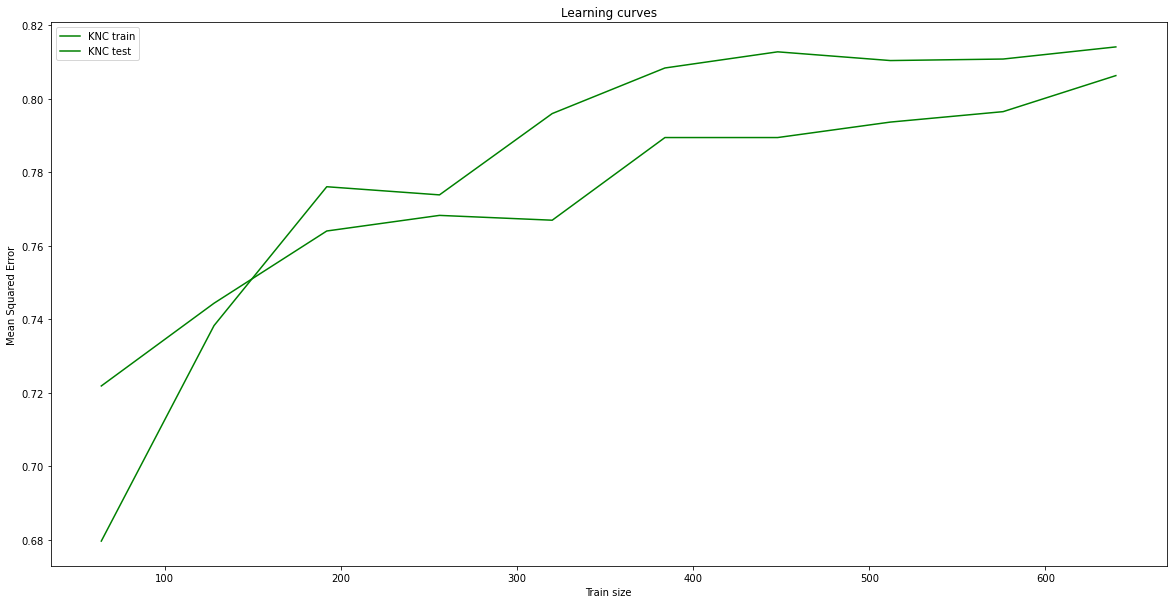

In [256]:
plt.figure(figsize=(20, 10))

plt.plot(train_sizes_KN_gs, train_scores_KN_gs.mean(1), color='g', label="KNC train")
plt.plot(train_sizes_KN_gs, test_scores_KN_gs.mean(1), color='g', label="KNC test")

#plt.plot(train_sizes_KN6, train_scores_KN6.mean(1), color='b', label="KNC train")
#plt.plot(train_sizes_KN6, test_scores_KN6.mean(1), color='b', label="KNC test")

#plt.plot(train_sizes_KN3, train_scores_KN3.mean(1), color='r', label="KNC train")
#plt.plot(train_sizes_KN3, test_scores_KN3.mean(1), color='r', label="KNC test")

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()

#### LogisticRegression

In [224]:
LRClsf_my = LogisticRegression(C=0.1, solver='liblinear', penalty='l1')
LRClsf_my.fit(X_train, y_train)
predLRClsf_my = LRClsf_my.predict(X_test)
accuracy_score(y_test, predLRClsf_my)

0.776536312849162

In [221]:
LRClsf_my2 = LogisticRegression(C=1, solver='lbfgs', penalty='l2')
LRClsf_my2.fit(X_train, y_train)
predLRClsf_my2 = LRClsf_my2.predict(X_test)
accuracy_score(y_test, predLRClsf_my2)

0.7821229050279329

In [219]:
LRClsf_my3 = LogisticRegression(C=0.01, solver='lbfgs', penalty='l2')
LRClsf_my3.fit(X_train, y_train)
predLRClsf_my3 = LRClsf_my3.predict(X_test)
accuracy_score(y_test, predLRClsf_my3)

0.8324022346368715

In [189]:
LRClsf_my4 = LogisticRegression(C=0.1, solver='newton-cg', penalty='l2')
LRClsf_my4.fit(X_train, y_train)
predLRClsf_my4 = LRClsf_my4.predict(X_test)
accuracy_score(y_test, predLRClsf_my4)

0.776536312849162

In [215]:
LRClsf_my5 = LogisticRegression(C=1, solver='saga', penalty='elasticnet', l1_ratio=1)
LRClsf_my5.fit(X_train, y_train)
predLRClsf_my5 = LRClsf_my5.predict(X_test)
accuracy_score(y_test, predLRClsf_my5)

0.7932960893854749

In [186]:
LRClsf_my6 = LogisticRegression(C=0.01, solver='newton-cg', penalty='l2')
LRClsf_my6.fit(X_train, y_train)
predLRClsf_my6 = LRClsf_my6.predict(X_test)
accuracy_score(y_test, predLRClsf_my6)

0.8324022346368715

In [192]:
parameter_grid = {'C': np.logspace(-4, 4, 50), 
                  'penalty' : ['l1','l2','elasticnet'],
                  'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
                 }
import warnings
warnings.filterwarnings('ignore')

grid_search = GridSearchCV(LRClsf, param_grid = parameter_grid, cv=10)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.802073552425665
Best params: {'C': 0.013257113655901081, 'penalty': 'l2', 'solver': 'liblinear'}


In [193]:
LRClsf_gs = grid_search.best_estimator_
LRClsf_gs.fit(X_train, y_train)
predLRClsf_gs = LRClsf_gs.predict(X_test)
accuracy_score(y_test, predLRClsf_gs)

0.8491620111731844

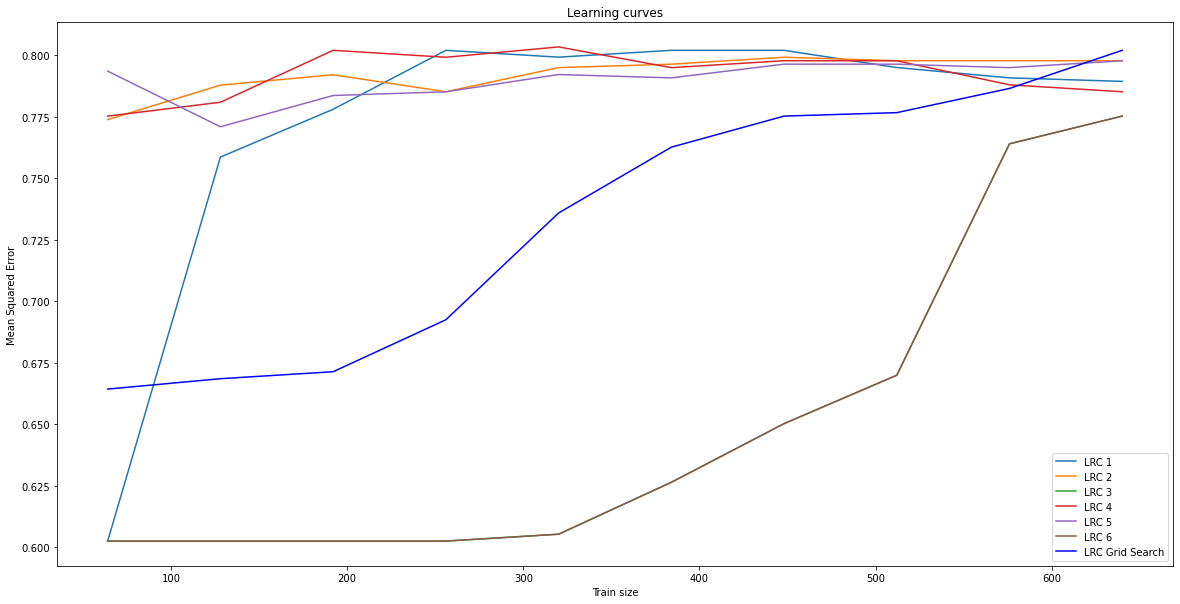

In [222]:
train_sizes_LR1, train_scores_LR1, test_scores_LR1 = learning_curve(LRClsf_my,  X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_LR2, train_scores_LR2, test_scores_LR2 = learning_curve(LRClsf_my2, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_LR3, train_scores_LR3, test_scores_LR3 = learning_curve(LRClsf_my3, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_LR4, train_scores_LR4, test_scores_LR4 = learning_curve(LRClsf_my4, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_LR5, train_scores_LR5, test_scores_LR5 = learning_curve(LRClsf_my5, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_LR6, train_scores_LR6, test_scores_LR6 = learning_curve(LRClsf_my6, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)
train_sizes_LR_gs, train_scores_LR_gs, test_scores_LR_gs = learning_curve(LRClsf_gs, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.figure(figsize=(20, 10))
plt.plot(train_sizes_LR1, test_scores_LR1.mean(1), label="LRC 1")
plt.plot(train_sizes_LR2, test_scores_LR2.mean(1), label="LRC 2")
plt.plot(train_sizes_LR3, test_scores_LR3.mean(1), label="LRC 3")
plt.plot(train_sizes_LR4, test_scores_LR4.mean(1), label="LRC 4")
plt.plot(train_sizes_LR5, test_scores_LR5.mean(1), label="LRC 5")
plt.plot(train_sizes_LR6, test_scores_LR6.mean(1), label="LRC 6")
plt.plot(train_sizes_LR_gs, test_scores_LR_gs.mean(1), color='b', label="LRC Grid Search")

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()

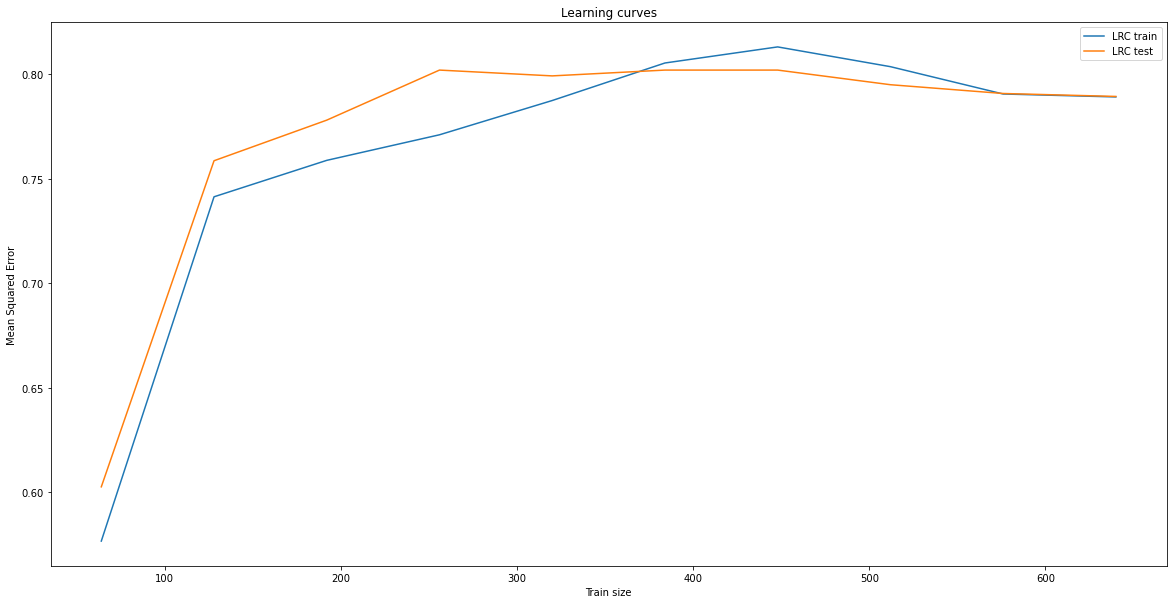

In [276]:
train_sizes_LR2, train_scores_LR2, test_scores_LR2 = learning_curve(LRClsf_my2, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.figure(figsize=(20, 10))
plt.plot(train_sizes_LR1, train_scores_LR1.mean(1), label="LRC train")
plt.plot(train_sizes_LR1, test_scores_LR1.mean(1), label="LRC test")

plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend()
plt.show()